In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
df = pd.read_excel(r'data\flight-price.xlsx')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [9]:
df.shape

(10683, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [4]:
df = df.dropna(axis=0)

In [14]:
df.duplicated().sum()

np.int64(220)

In [5]:
df = df.drop_duplicates()

In [6]:
df = df.reset_index().drop(labels=['index'],axis=1)

In [17]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [7]:
df['Day_of_journey']  = df['Date_of_Journey'].str.split('/').str[0]
df['Month_of_journey']  = df['Date_of_Journey'].str.split('/').str[1]
df['Year_of_journey']  = df['Date_of_Journey'].str.split('/').str[2]

In [8]:
df['Day_of_journey'] = df['Day_of_journey'].astype(int)
df['Month_of_journey'] = df['Month_of_journey'].astype(int)
df['Year_of_journey'] = df['Year_of_journey'].astype(int)

In [9]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_minute'] = df['Dep_Time'].str.split(':').str[1]
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_minute'] = df['Dep_minute'].astype(int)

In [21]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], shape=(1343,), dtype=object)

In [10]:
df['Arrival_Time'] = df['Arrival_Time'].str.split(" ").str[0]
df['Arrival_hour'] = df['Arrival_Time'].str.split(":").str[0]
df['Arrival_minute'] = df['Arrival_Time'].str.split(":").str[1]
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_minute'] = df['Arrival_minute'].astype(int)

In [23]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [11]:
duration = pd.to_timedelta(df['Duration'])

In [12]:
for i  in range(0,len(duration)):
    df.loc[i,'Duration_mins'] = duration[i].seconds //60

In [26]:
df.sample(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins
7375,Jet Airways,21/05/2019,Kolkata,Banglore,CCU → BOM → BLR,14:05,22:35,8h 30m,1 stop,No info,14781,21,5,2019,14,5,22,35,510.0
6120,Multiple carriers,27/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,21:20,11h 35m,2 stops,No info,6653,27,3,2019,9,45,21,20,695.0


In [13]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [14]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [15]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10462 non-null  object 
 1   Date_of_Journey   10462 non-null  object 
 2   Source            10462 non-null  object 
 3   Destination       10462 non-null  object 
 4   Route             10462 non-null  object 
 5   Dep_Time          10462 non-null  object 
 6   Arrival_Time      10462 non-null  object 
 7   Duration          10462 non-null  object 
 8   Total_Stops       10462 non-null  int64  
 9   Additional_Info   10462 non-null  object 
 10  Price             10462 non-null  int64  
 11  Day_of_journey    10462 non-null  int64  
 12  Month_of_journey  10462 non-null  int64  
 13  Year_of_journey   10462 non-null  int64  
 14  Dep_hour          10462 non-null  int64  
 15  Dep_minute        10462 non-null  int64  
 16  Arrival_hour      10462 non-null  int64 

In [16]:
df = df.drop(labels=['Route','Dep_Time','Arrival_Time','Duration'],axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10462 non-null  object 
 1   Date_of_Journey   10462 non-null  object 
 2   Source            10462 non-null  object 
 3   Destination       10462 non-null  object 
 4   Total_Stops       10462 non-null  int64  
 5   Additional_Info   10462 non-null  object 
 6   Price             10462 non-null  int64  
 7   Day_of_journey    10462 non-null  int64  
 8   Month_of_journey  10462 non-null  int64  
 9   Year_of_journey   10462 non-null  int64  
 10  Dep_hour          10462 non-null  int64  
 11  Dep_minute        10462 non-null  int64  
 12  Arrival_hour      10462 non-null  int64  
 13  Arrival_minute    10462 non-null  int64  
 14  Duration_mins     10462 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 1.2+ MB


In [17]:
categorical = [col for col in df if df[col].dtype == 'O']
numerical = [col for col in df if df[col].dtype != 'O']

In [34]:
df.drop(labels=categorical,axis=1).corr()['Price']

Total_Stops         0.602013
Price               1.000000
Day_of_journey     -0.159044
Month_of_journey   -0.113396
Year_of_journey          NaN
Dep_hour            0.005155
Dep_minute         -0.024155
Arrival_hour        0.031023
Arrival_minute     -0.086163
Duration_mins       0.450547
Name: Price, dtype: float64

In [35]:
df['Year_of_journey'].unique()

array([2019])

In [36]:
df['Arrival_time'] = df['Arrival_hour']*100 + df['Arrival_minute']
df['Dep_time'] = df['Dep_hour']*100 + df['Dep_minute']

In [37]:
df.drop(labels=categorical,axis=1).corr()['Price']

Total_Stops         0.602013
Price               1.000000
Day_of_journey     -0.159044
Month_of_journey   -0.113396
Year_of_journey          NaN
Dep_hour            0.005155
Dep_minute         -0.024155
Arrival_hour        0.031023
Arrival_minute     -0.086163
Duration_mins       0.450547
Arrival_time        0.029039
Dep_time            0.004361
Name: Price, dtype: float64

In [22]:
df['Arrival_time_sinceMidnight'] = df['Arrival_hour']*60 + df['Arrival_minute']
df['Dep_time_sinceMidnight'] = df['Dep_hour']*60 + df['Dep_minute']

In [39]:
df.drop(labels=categorical,axis=1).corr()['Price']

Total_Stops                   0.602013
Price                         1.000000
Day_of_journey               -0.159044
Month_of_journey             -0.113396
Year_of_journey                    NaN
Dep_hour                      0.005155
Dep_minute                   -0.024155
Arrival_hour                  0.031023
Arrival_minute               -0.086163
Duration_mins                 0.450547
Arrival_time                  0.029039
Dep_time                      0.004361
Arrival_time_sinceMidnight    0.027700
Dep_time_sinceMidnight        0.003830
Name: Price, dtype: float64

In [40]:
df = df.drop(labels=['Arrival_time','Dep_time'],axis=1)

In [41]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins,Arrival_time_sinceMidnight,Dep_time_sinceMidnight
0,IndiGo,24/03/2019,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,170.0,70,1340
1,Air India,1/05/2019,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,445.0,795,350


In [42]:
order = df.groupby('Airline')['Price'].mean().sort_values(ascending=False).index

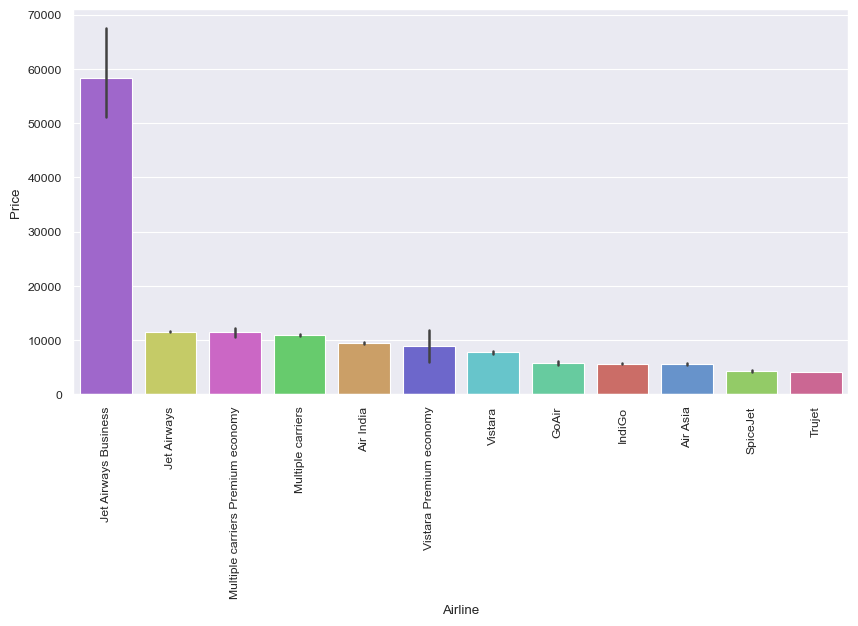

In [43]:
sns.set_theme(context='paper',style='darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(df,x='Airline',y='Price',hue='Airline',palette='hls',order=order)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Airline')

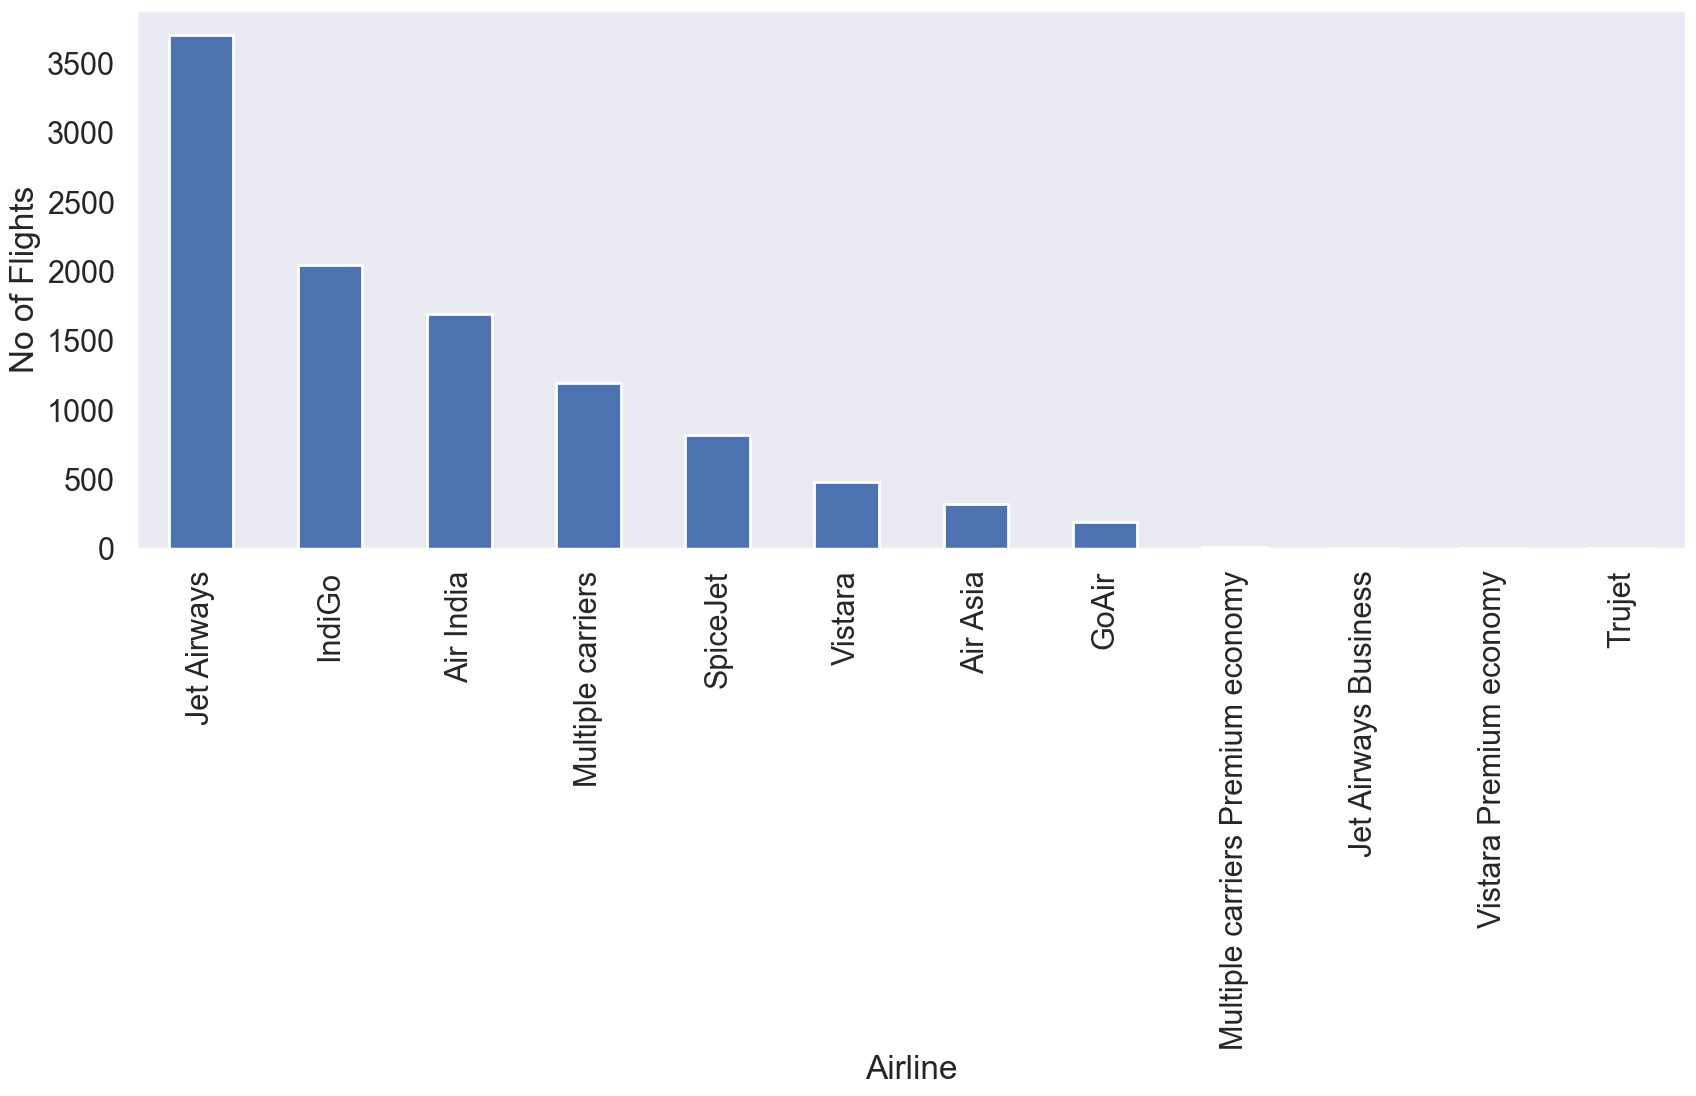

In [44]:
plt.figure(figsize=(20,7))
sns.set_theme(context='poster',style='dark')
df['Airline'].value_counts().plot(kind='bar')
plt.ylabel('No of Flights')
plt.xlabel('Airline')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Business class'),
  Text(1, 0, '1 Short layover'),
  Text(2, 0, '2 Long layover'),
  Text(3, 0, '1 Long layover'),
  Text(4, 0, 'Change airports'),
  Text(5, 0, 'Red-eye flight'),
  Text(6, 0, 'In-flight meal not included'),
  Text(7, 0, 'No info'),
  Text(8, 0, 'No Info'),
  Text(9, 0, 'No check-in baggage included')])

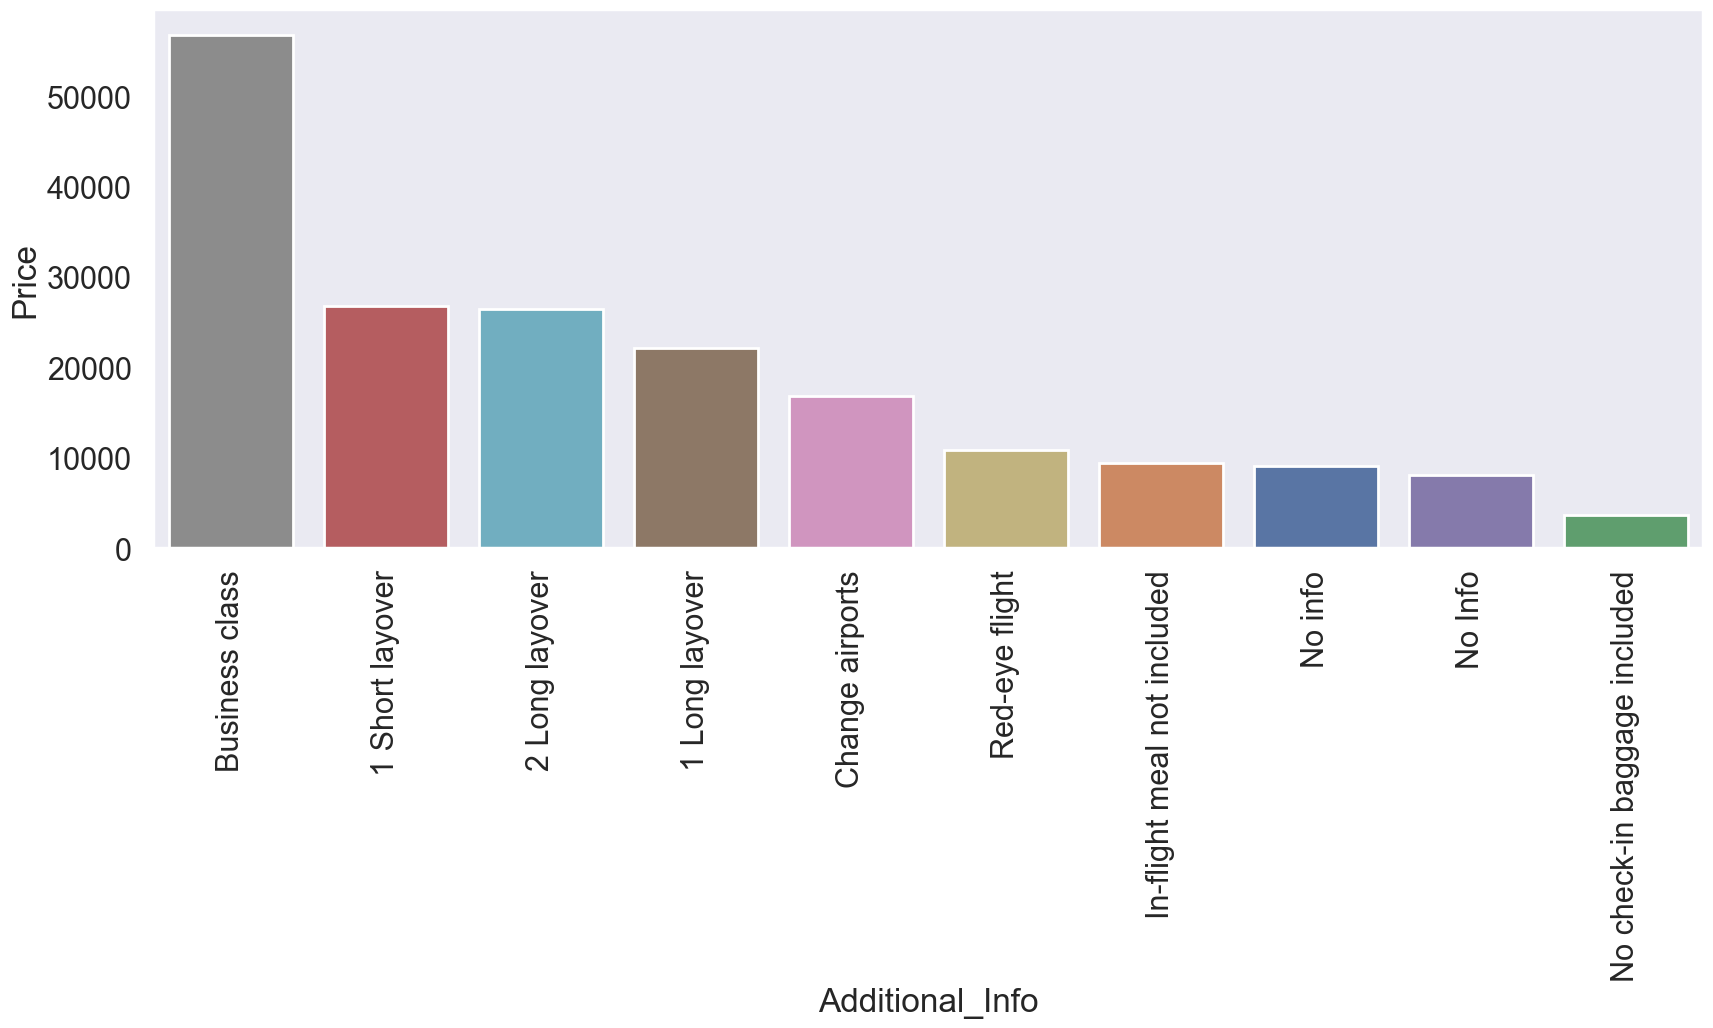

In [45]:
order = df.groupby('Additional_Info')['Price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(20,7))
sns.set_theme(context='poster',style='dark')
sns.barplot(df,x='Additional_Info',y='Price',hue='Additional_Info',errorbar=None,order=order)
plt.xticks(rotation='vertical')

<Axes: xlabel='Total_Stops', ylabel='Price'>

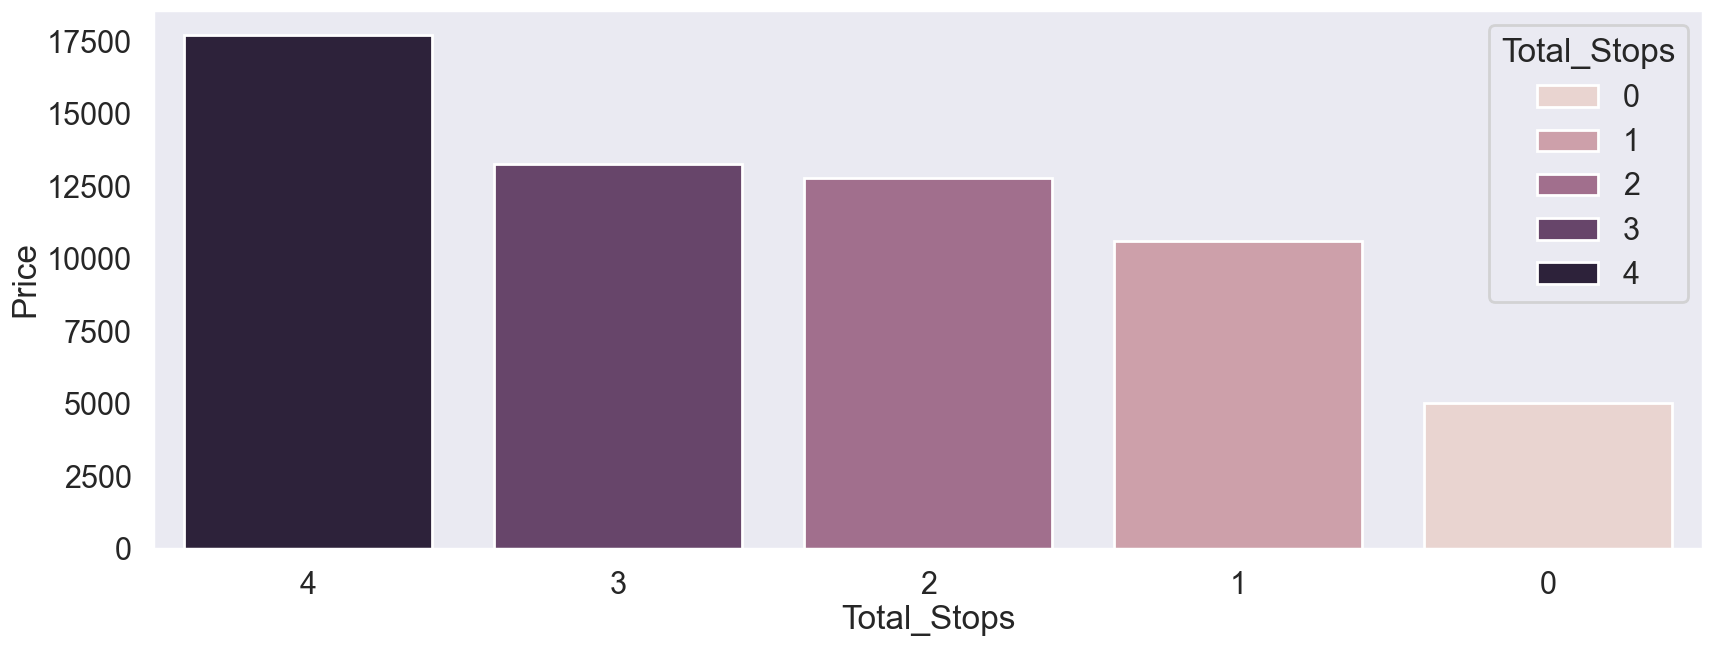

In [46]:
order = df.groupby('Total_Stops')['Price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(20,7))
sns.set_theme(context='poster',style='dark')
sns.barplot(df,x='Total_Stops',y='Price',hue='Total_Stops',errorbar=None,order=order)

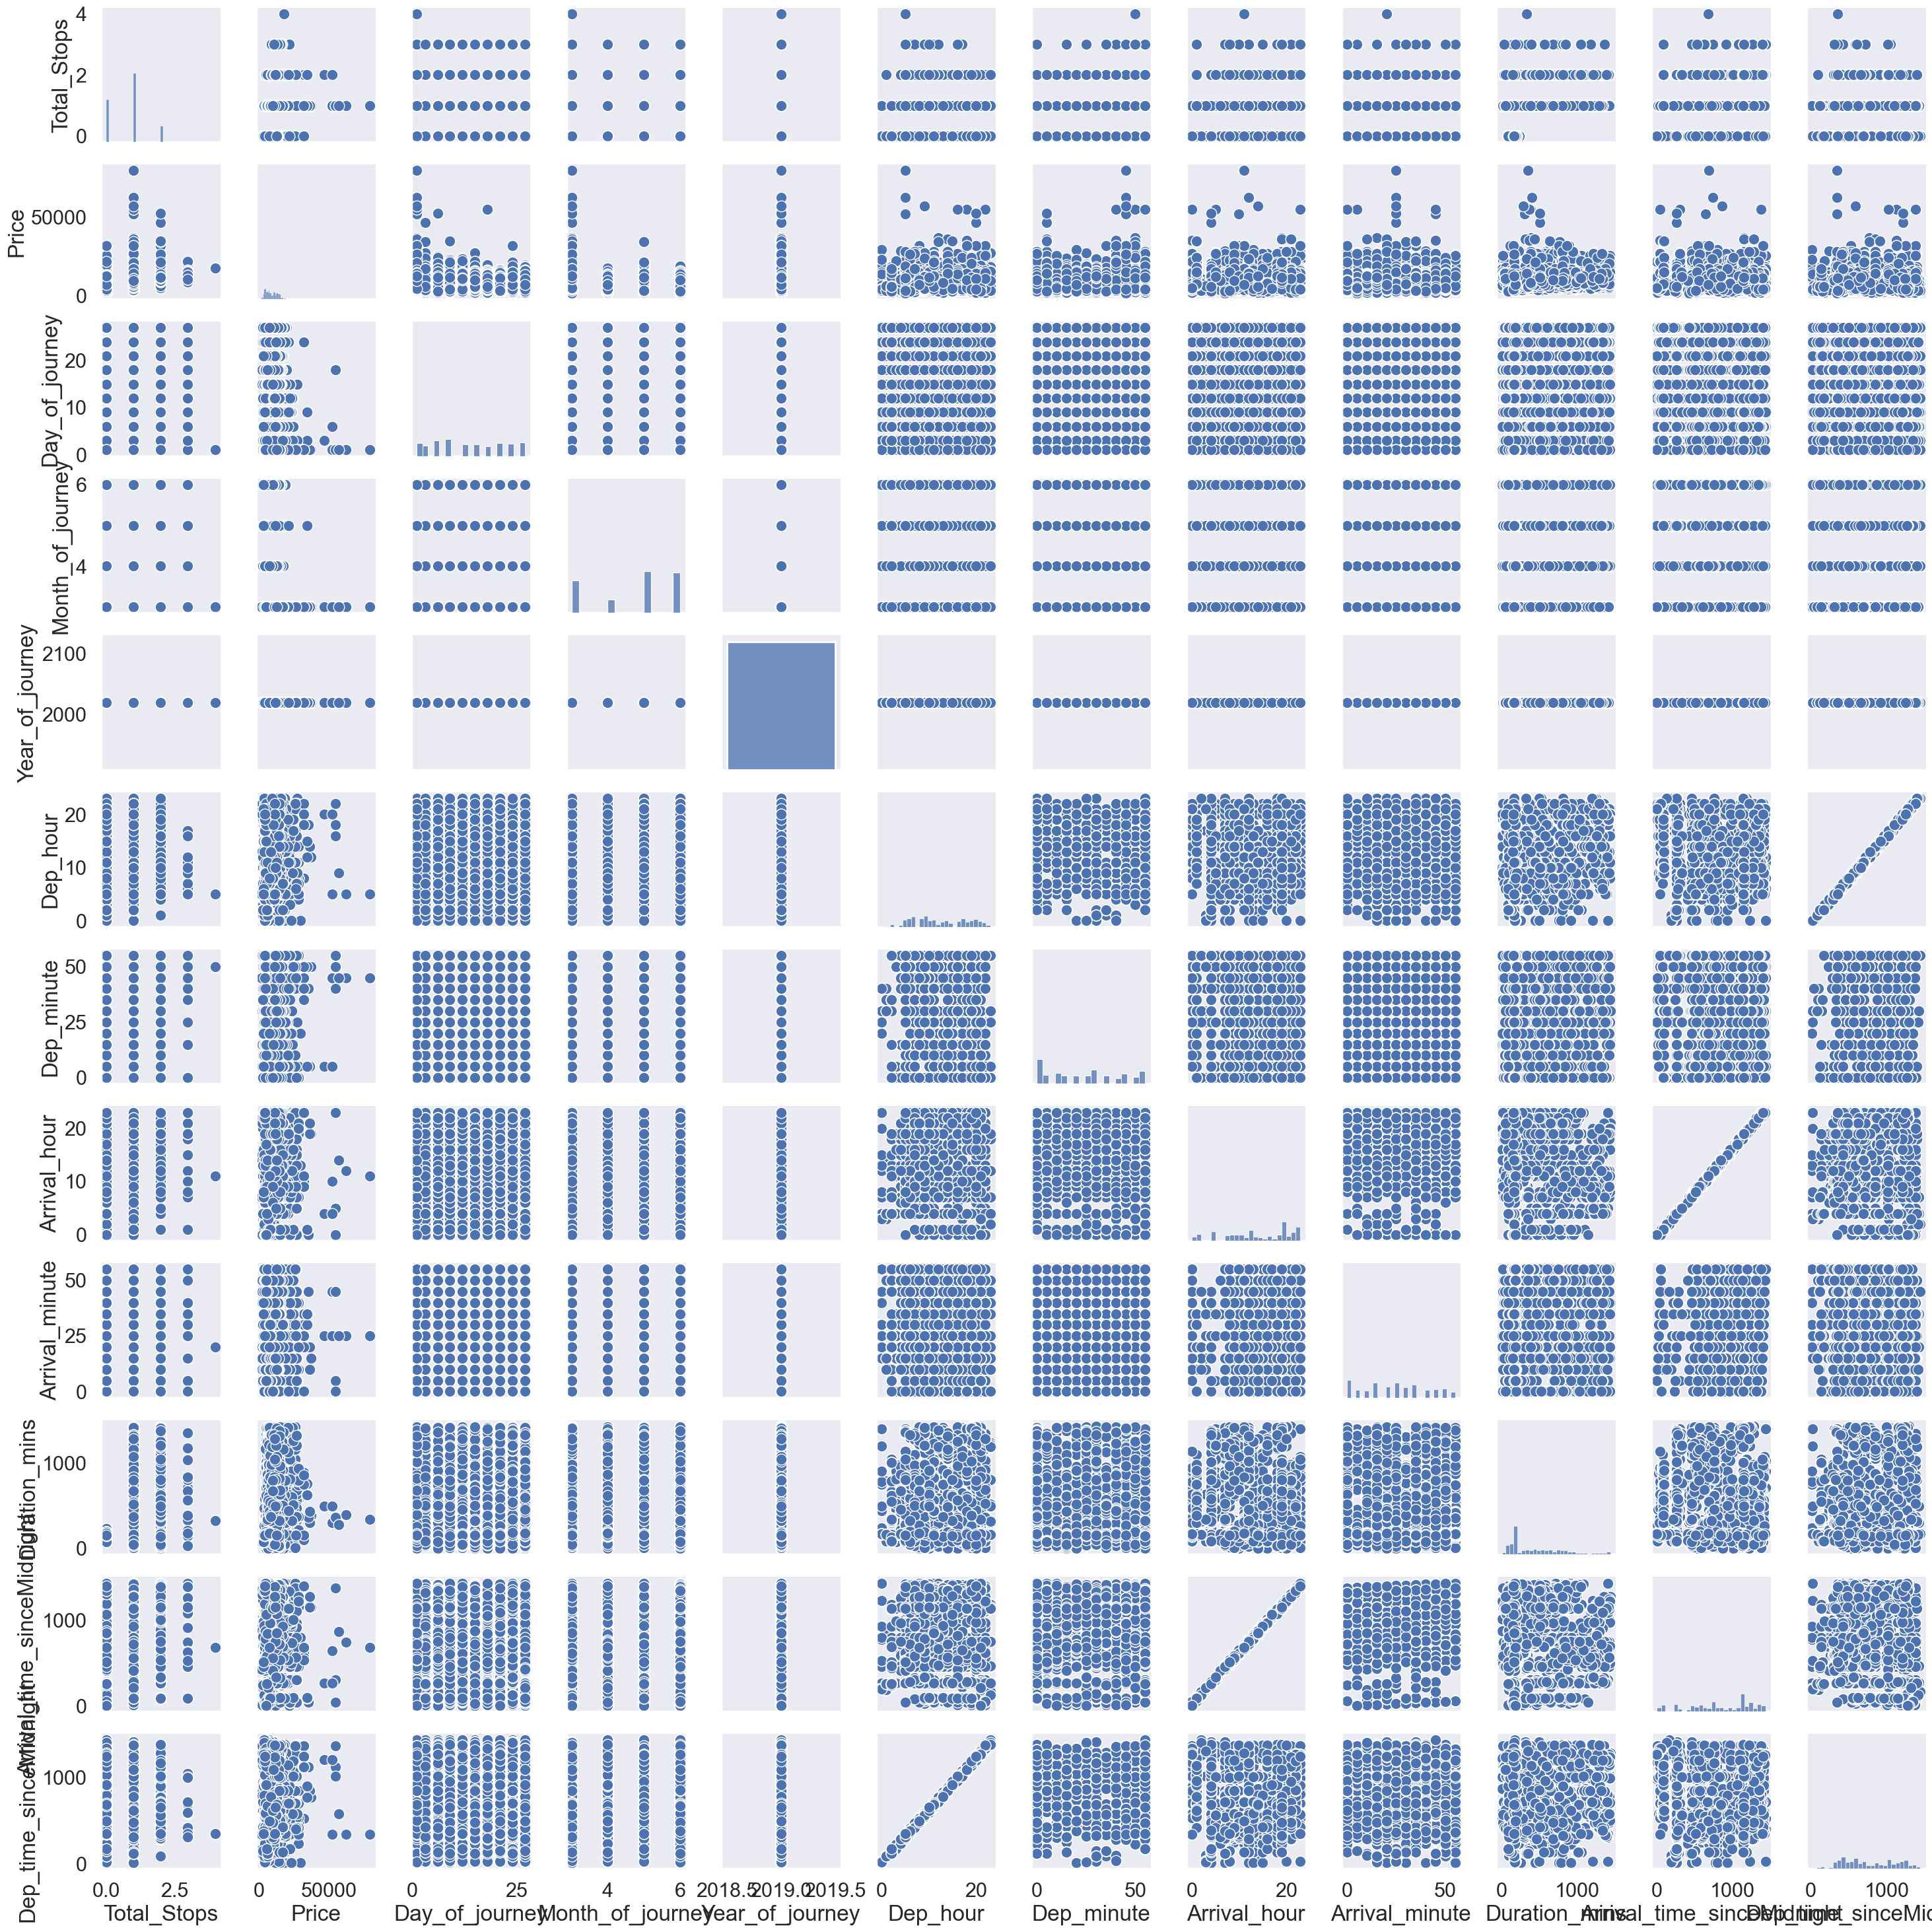

In [42]:
sns.pairplot(df)

In [19]:
df.drop(labels=categorical,axis=1).corr(method="spearman")['Price']

Total_Stops         0.716599
Price               1.000000
Day_of_journey     -0.126850
Month_of_journey   -0.048930
Year_of_journey          NaN
Dep_hour            0.006096
Dep_minute         -0.063518
Arrival_hour        0.049502
Arrival_minute     -0.105109
Duration_mins       0.576747
Name: Price, dtype: float64

<Axes: xlabel='Dep_time_sinceMidnight', ylabel='Price'>

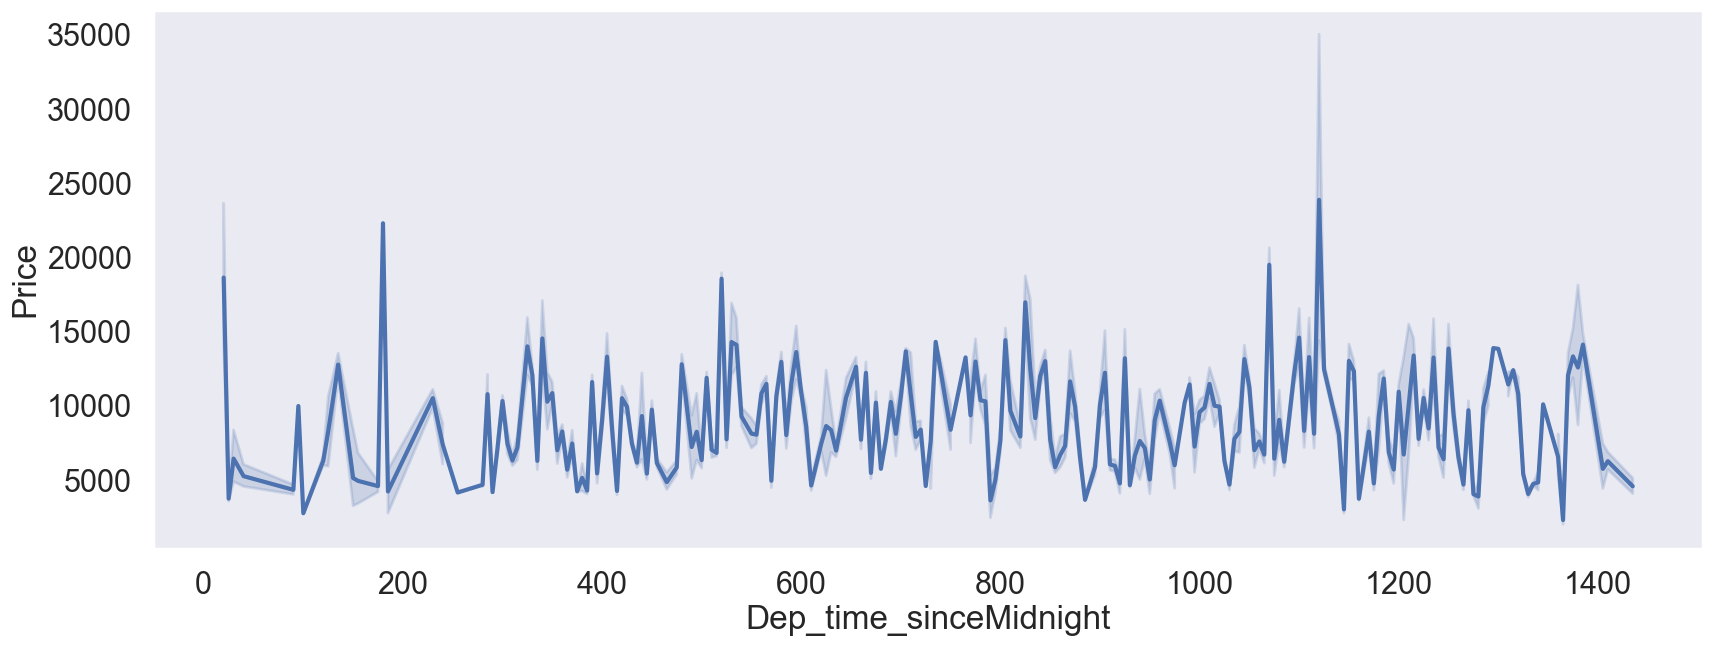

In [47]:
plt.figure(figsize=(20,7))
sns.lineplot(df,y='Price',x='Dep_time_sinceMidnight')

<Axes: xlabel='Arrival_time_sinceMidnight', ylabel='Price'>

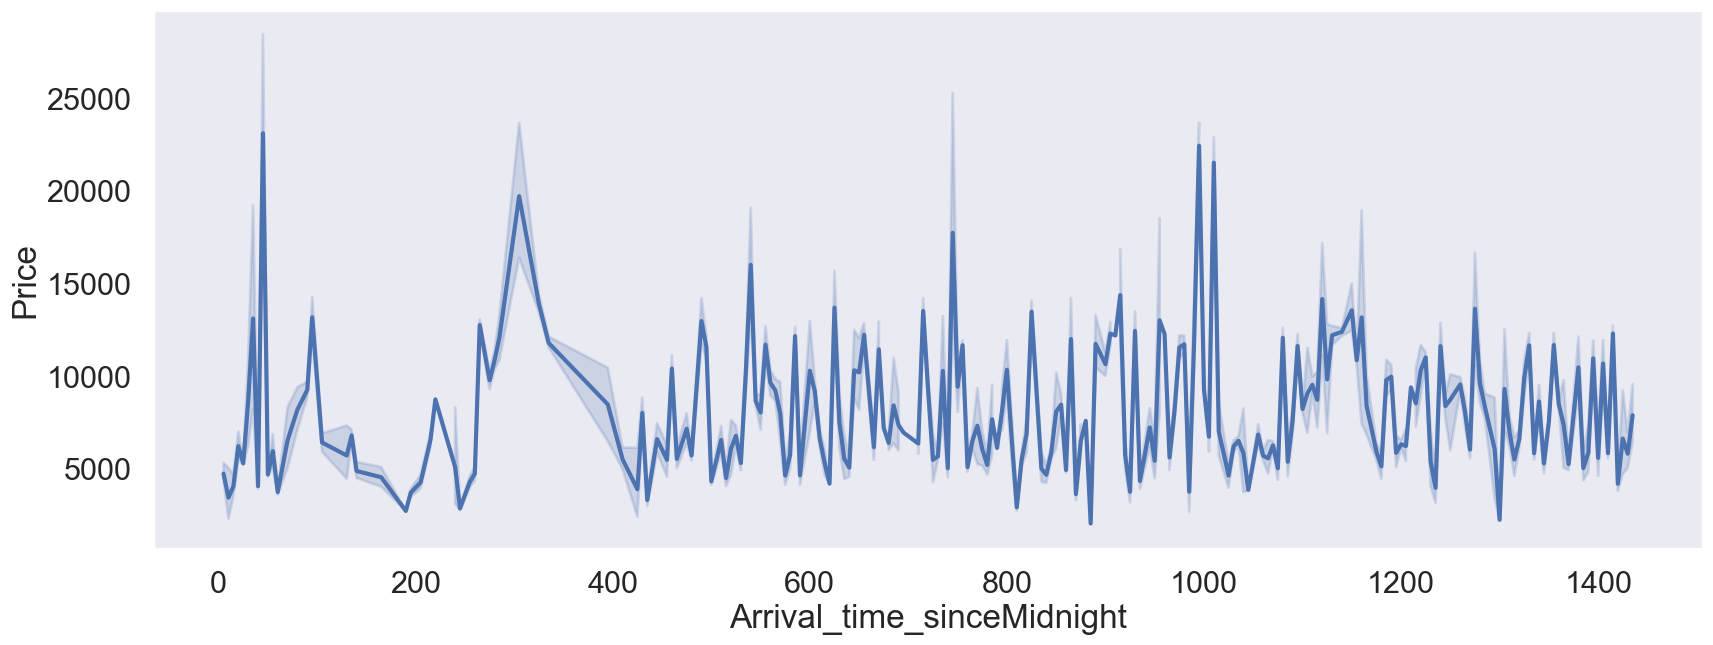

In [44]:
plt.figure(figsize=(20,7))
sns.lineplot(df,y='Price',x='Arrival_time_sinceMidnight')

<Axes: xlabel='Price', ylabel='Density'>

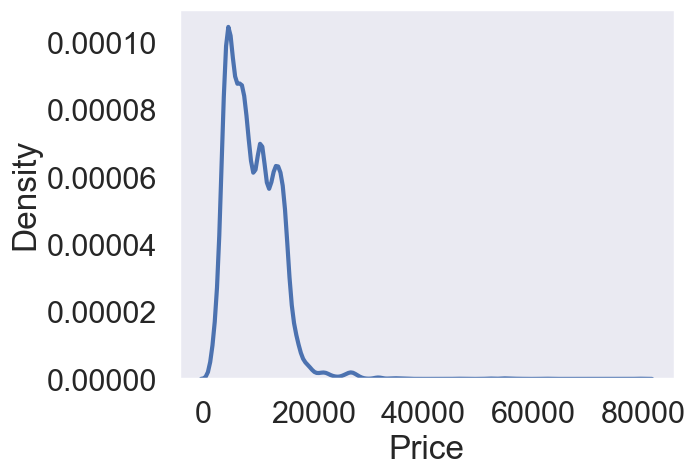

In [45]:
sns.kdeplot(df,x='Price')

{'whiskers': [<matplotlib.lines.Line2D at 0x1cbcb5bc830>,
 'caps': [<matplotlib.lines.Line2D at 0x1cbcb5be120>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cbc94b1460>],
 'medians': [<matplotlib.lines.Line2D at 0x1cbcb5be840>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cbcb5be9c0>],
 'means': []}

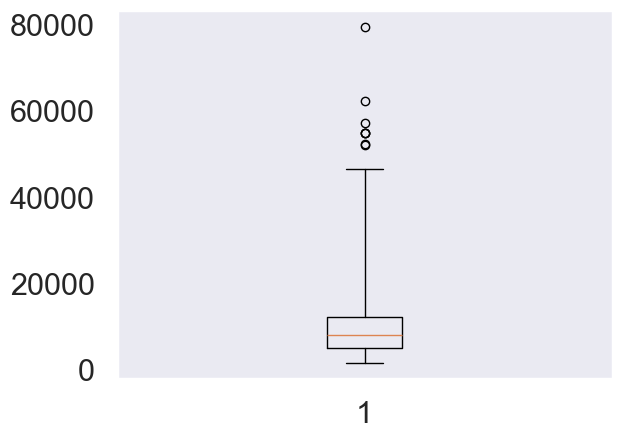

In [46]:
plt.boxplot(x=df['Price'],whis=5.0)

In [48]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [49]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [24]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

In [25]:
locatitons = set()
locatitons.update(df['Source'].unique())
locatitons.update(df['Destination'].unique())
print(locatitons)

{'Hyderabad', 'Banglore', 'Kolkata', 'Mumbai', 'New Delhi', 'Delhi', 'Chennai', 'Cochin'}


In [26]:
geolocator = Nominatim(user_agent='Self_EDA_Project')
coordinates = {}
for city in locatitons:
    coordinates[city] = geolocator.geocode(city)

In [27]:
coordinates['Banglore'] = geolocator.geocode('Bangalore, India')

In [28]:
for i in range(len(df)):
    source = coordinates[df.loc[i,'Source']]
    destination = coordinates[df.loc[i,'Destination']]
    df.loc[i,'Distance (in Km)'] = geodesic((source.latitude,source.longitude),(destination.latitude,destination.longitude)).km

df.sample(3)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins,Arrival_time_sinceMidnight,Dep_time_sinceMidnight,Distance (in Km)
4722,Air Asia,21/05/2019,Kolkata,Banglore,1,No info,5162,21,5,2019,6,50,10,30,220.0,630,410,1555.067481
8835,Jet Airways,6/05/2019,Kolkata,Banglore,1,No info,14388,6,5,2019,14,5,12,0,1315.0,720,845,1555.067481
1464,Jet Airways,12/03/2019,Banglore,New Delhi,1,No info,13817,12,3,2019,22,55,12,25,810.0,745,1375,1733.814838


In [29]:
df.drop(labels=categorical,axis=1).corr(method="spearman")['Price']

Total_Stops                   0.716599
Price                         1.000000
Day_of_journey               -0.126850
Month_of_journey             -0.048930
Year_of_journey                    NaN
Dep_hour                      0.006096
Dep_minute                   -0.063518
Arrival_hour                  0.049502
Arrival_minute               -0.105109
Duration_mins                 0.576747
Arrival_time_sinceMidnight    0.043476
Dep_time_sinceMidnight        0.001724
Distance (in Km)              0.369971
Name: Price, dtype: float64

<Axes: xlabel='Distance', ylabel='Price'>

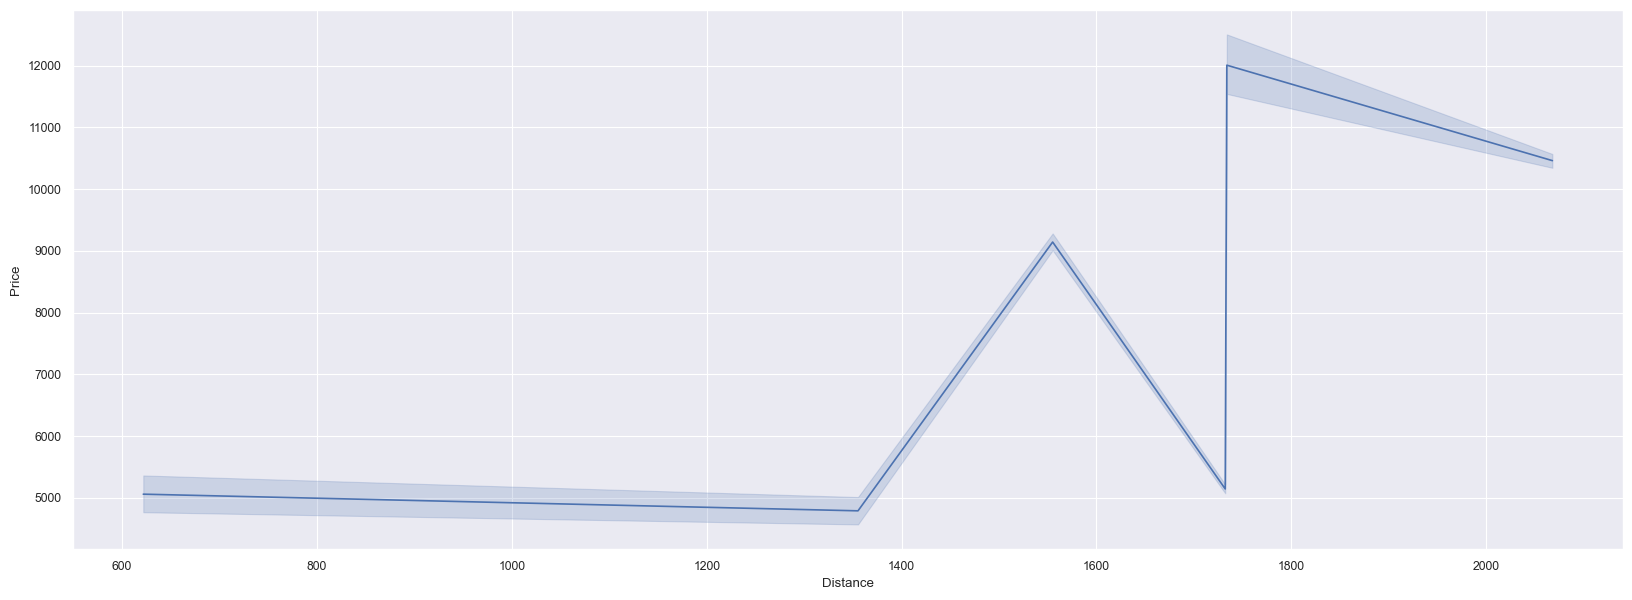

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(df,y='Price',x='Distance')

In [ ]:
counts = df['Airline'].value_counts()

In [ ]:
counts

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [60]:
df['Premium'] = df['Airline'].apply(lambda x: 1 if 'Premium' in x or 'Business' in x else 0)

In [61]:
def airline(x):
    if 'Trujet' in x or 'GoAir' in x or 'Multiple carriers' in x:
        return 'Multiple carriers'
    elif 'Jet Airways' in x:
        return 'Jet Airways'
    elif 'Vistara' in x:
        return 'Vistara'
    else: 
        return x

In [62]:
df['Airline'] = df['Airline'].apply(airline)

In [59]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins,Arrival_time_sinceMidnight,Dep_time_sinceMidnight,Distance,Premium
0,IndiGo,24/03/2019,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,170.0,70,1340,1733.814838,0
1,Air India,1/05/2019,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,445.0,795,350,1555.067481,0
2,Jet Airways,9/06/2019,Delhi,Cochin,2,No info,13882,9,6,2019,9,25,4,25,1140.0,265,565,2067.937532,0


In [63]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c078864410>,
 'caps': [<matplotlib.lines.Line2D at 0x1c079199e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c079199940>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07919a3f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07919a660>],
 'means': []}

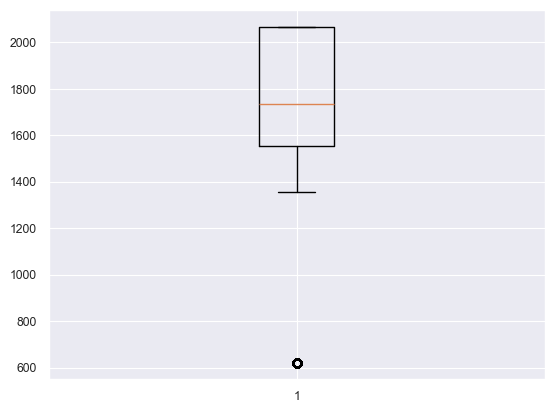

In [ ]:
plt.boxplot(x=df['Distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0793f7c20>,
 'caps': [<matplotlib.lines.Line2D at 0x1c07941c170>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c079417dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c07941c6e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c07941c8c0>],
 'means': []}

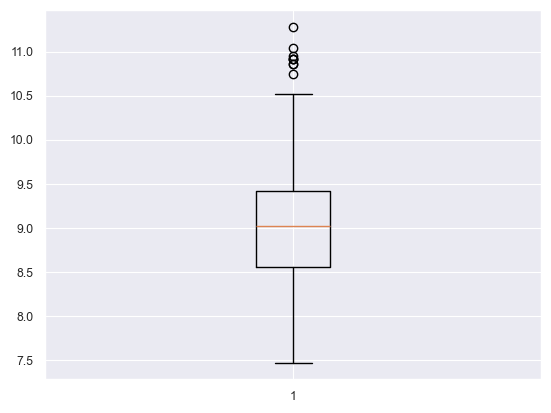

In [ ]:
plt.boxplot(x=np.log(df['Price']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airline                     10462 non-null  object 
 1   Date_of_Journey             10462 non-null  object 
 2   Source                      10462 non-null  object 
 3   Destination                 10462 non-null  object 
 4   Total_Stops                 10462 non-null  int32  
 5   Additional_Info             10462 non-null  object 
 6   Price                       10462 non-null  int64  
 7   Day_of_journey              10462 non-null  int32  
 8   Month_of_journey            10462 non-null  int32  
 9   Year_of_journey             10462 non-null  int32  
 10  Dep_hour                    10462 non-null  int32  
 11  Dep_minute                  10462 non-null  int32  
 12  Arrival_hour                10462 non-null  int32  
 13  Arrival_minute              104

In [64]:
df = df.drop(['Date_of_Journey','Source','Destination'],axis=1)

In [65]:
y = df['Price']
df = df.drop(['Price'],axis=1)

In [66]:
categorical = [col for col in df if df[col].dtype == 'O']
numerical = [col for col in df if df[col].dtype != 'O']

In [67]:
df['Additional_Info'] = df['Additional_Info'].apply(lambda x: 'No Info' if 'No info' in x else x)

In [68]:
df.head()

,Airline,Total_Stops,Additional_Info,Day_of_journey,Month_of_journey,Year_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_mins,Arrival_time_sinceMidnight,Dep_time_sinceMidnight,Distance (in Km),Premium
0,IndiGo,0,No Info,24,3,2019,22,20,1,10,170.0,70,1340,1733.814838,0
1,Air India,2,No Info,1,5,2019,5,50,13,15,445.0,795,350,1555.067481,0
2,Jet Airways,2,No Info,9,6,2019,9,25,4,25,1140.0,265,565,2067.937532,0
3,IndiGo,1,No Info,12,5,2019,18,5,23,30,325.0,1410,1085,1555.067481,0
4,IndiGo,1,No Info,1,3,2019,16,50,21,35,285.0,1295,1010,1733.814838,0


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ('OHE',OneHotEncoder(sparse_output=False,drop='first'),categorical),
        ('Scaling',StandardScaler(),numerical)
    ],
    remainder='passthrough',
    verbose=True
)
transformer.set_output(transform='pandas')
transformed_df = transformer.fit_transform(df)
transformed_df.head(2)

[ColumnTransformer] ........... (1 of 2) Processing OHE, total=   0.0s
[ColumnTransformer] ....... (2 of 2) Processing Scaling, total=   0.0s


,OHE__Airline_Air India,OHE__Airline_IndiGo,OHE__Airline_Jet Airways,OHE__Airline_Multiple carriers,OHE__Airline_SpiceJet,OHE__Airline_Vistara,OHE__Additional_Info_1 Short layover,OHE__Additional_Info_2 Long layover,OHE__Additional_Info_Business class,OHE__Additional_Info_Change airports,...,Scaling__Year_of_journey,Scaling__Dep_hour,Scaling__Dep_minute,Scaling__Arrival_hour,Scaling__Arrival_minute,Scaling__Duration_mins,Scaling__Arrival_time_sinceMidnight,Scaling__Dep_time_sinceMidnight,Scaling__Distance,Scaling__Premium
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.662578,-0.234123,-1.807045,-0.888367,-0.835021,-1.852703,1.648648,-0.004861,-0.045905
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.305841,1.360364,-0.056554,-0.586611,-0.104399,-0.080615,-1.230525,-0.478044,-0.045905


In [67]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'Vistara', 'Air Asia'], dtype=object)

In [68]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   OHE__Airline_Air India                             10462 non-null  float64
 1   OHE__Airline_IndiGo                                10462 non-null  float64
 2   OHE__Airline_Jet Airways                           10462 non-null  float64
 3   OHE__Airline_Multiple carriers                     10462 non-null  float64
 4   OHE__Airline_SpiceJet                              10462 non-null  float64
 5   OHE__Airline_Vistara                               10462 non-null  float64
 6   OHE__Additional_Info_1 Short layover               10462 non-null  float64
 7   OHE__Additional_Info_2 Long layover                10462 non-null  float64
 8   OHE__Additional_Info_Business class                10462 non-null  float64
 9   OHE__A